Summary Statistics On Numeric Variables

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

Read Dataset

In [20]:
import pandas as pd
df = pd.read_csv('train.csv')

Exploratory Data Analysis

In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Target Variable

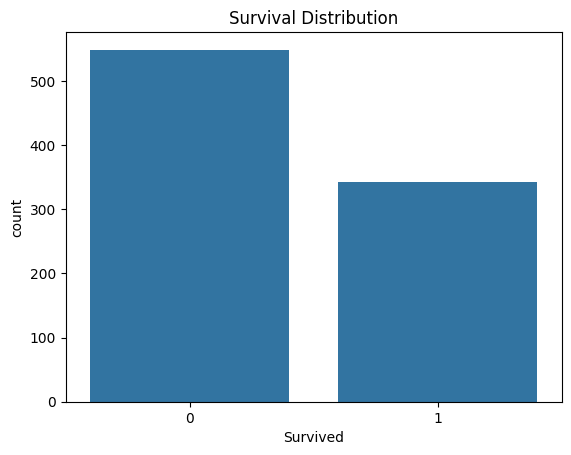

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

Age Distribution

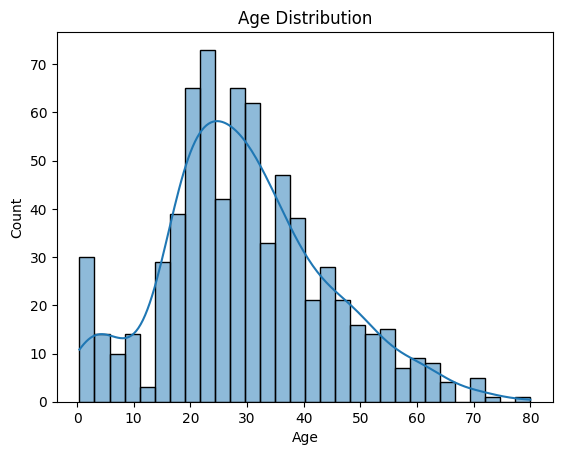

In [ ]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Survive Counts By Gender

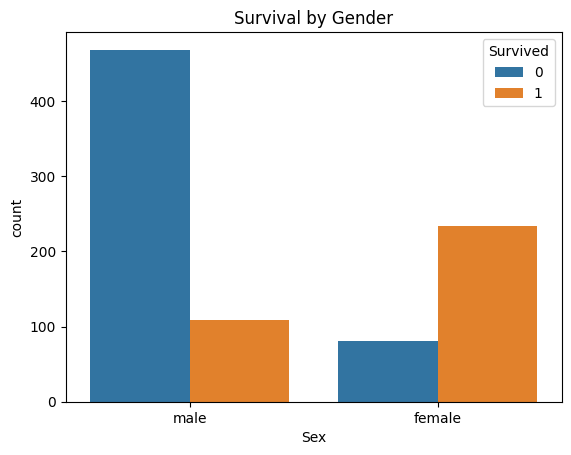

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

Survive Counts By Passenger Class

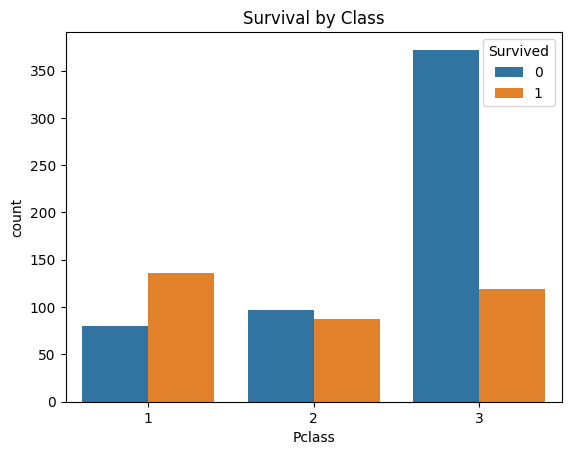

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

Data Preprocessing and feature preprocessing

In [28]:
num_features = ['Age', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked']
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

Prepare Data

In [23]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Model Training

In [30]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

Model Evaluation

In [31]:
from sklearn.metrics import roc_auc_score


best_model = grid_search.best_estimator_
y_train_pred = best_model.predict_proba(X_train)[:, 1]
y_val_pred = best_model.predict_proba(X_val)[:, 1]
y_test_pred = best_model.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

print(f"AUC - Train: {auc_train:.4f}, Validation: {auc_val:.4f}, Test: {auc_test:.4f}")

AUC - Train: 0.9887, Validation: 0.9246, Test: 0.8240
